In [1]:
import cv2
vidcap = cv2.VideoCapture('1mintest.mp4')

In [2]:
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        cv2.imwrite(r"D:\2_Semester_2_2022_MSHCA_Niyatha\video_analytics\VideoAnalytics-20220314T031740Z-001\VideoAnalytics\video-analytics\Images"+str(count)+".jpg", image)     # save frame as JPG file
    return hasFrames


In [3]:
sec = 0
frameRate = 20 #//it will capture image in each 0.5 second
count=1
success = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

In [4]:
# function for face detection with mtcnn
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN

# extract a single face from a given photograph
#change pixels!
def extract_face(filename, required_size=(2000, 2000)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    return results

In [5]:
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
	# show the plot
	pyplot.show()
    
#pyplot.savefig(r"C:\Users\lenovo\AppData\Local\Programs\Python\venv\deeplearning\facenet\video-analytics\Faces\mtcnn\face"+str(i)+".jpg")

In [6]:
import os
import glob
from matplotlib import pyplot
from matplotlib.patches import Rectangle

W0903 01:25:20.610406 22112 deprecation_wrapper.py:119] From c:\users\lenovo\appdata\local\programs\python\venv\deeplearning\lib\site-packages\mtcnn\mtcnn.py:187: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0903 01:25:20.635373 22112 deprecation_wrapper.py:119] From c:\users\lenovo\appdata\local\programs\python\venv\deeplearning\lib\site-packages\mtcnn\mtcnn.py:193: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0903 01:25:20.668113 22112 deprecation_wrapper.py:119] From c:\users\lenovo\appdata\local\programs\python\venv\deeplearning\lib\site-packages\mtcnn\network.py:43: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0903 01:25:20.670202 22112 deprecation_wrapper.py:119] From c:\users\lenovo\appdata\local\programs\python\venv\deeplearning\lib\site-packages\mtcnn\layer_factory.py:88: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0

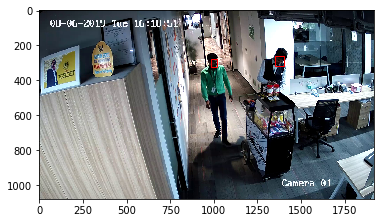

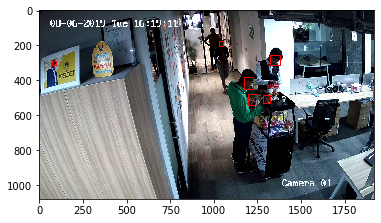

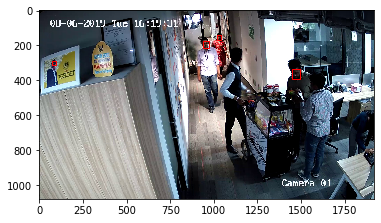

In [7]:
img_dir = r"C:\Users\lenovo\AppData\Local\Programs\Python\venv\deeplearning\facenet\video-analytics\Images\mtcnn"
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
for i in files:
    draw_image_with_boxes(i,extract_face(i))

In [6]:
# extract and plot each detected face in a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

# draw each face separately
def draw_faces(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot each face as a subplot
    flag=0
    for i in range(len(result_list)):
        # get coordinates
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        # define subplot
        pyplot.subplot(1, len(result_list), i+1)
        pyplot.axis('off')
        # plot face
        pyplot.imshow(data[y1:y2, x1:x2])
        #pyplot.imshow(data[x1:x2])
        #pyplot.savefig(r"C:\Users\lenovo\AppData\Local\Programs\Python\venv\deeplearning\facenet\video-analytics\Faces\mtcnn\face"+str(i)+".jpg")        
        # show the plot
#         pyplot.show()
        filename_new=filename.replace("C:\\Users\\lenovo\\AppData\\Local\\Programs\\Python\\venv\\deeplearning\\facenet\\video-analytics\\Images\\mtcnn\\","").replace(".jpg","")
        pyplot.savefig(r"C:\Users\lenovo\AppData\Local\Programs\Python\venv\deeplearning\facenet\video-analytics\Faces\mtcnn\''"+str(filename_new)+str(flag)+".png")        
        pyplot.close()
        flag=flag+1
#         print(type(filename))

In [9]:
img_dir = r"C:\Users\lenovo\AppData\Local\Programs\Python\venv\deeplearning\facenet\video-analytics\Images\mtcnn"
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
flag=0
for i in files:
    draw_faces(i,extract_face(i))    
    flag=flag+1    